### Homework Rakamin Trial Class - Mini Case

In [35]:
#import lib
import numpy as np
import pandas as pd

# Mengukur Performa Penjualan Ritel Online

## Load Data

In [134]:
url = 'https://drive.google.com/file/d/1r0qXP_unNdthoUNSrh1z8CfBwWFko_w6/view?usp=sharing'
url2= 'https://drive.google.com/uc?id=' + url.split('/')[-2]

df = pd.read_csv(url2)

In [135]:
df.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom


## Section 1

### 1.1 Create New Feature: Year

In [136]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1067371 entries, 0 to 1067370
Data columns (total 8 columns):
 #   Column       Non-Null Count    Dtype  
---  ------       --------------    -----  
 0   Invoice      1067371 non-null  object 
 1   StockCode    1067371 non-null  object 
 2   Description  1062989 non-null  object 
 3   Quantity     1067371 non-null  int64  
 4   InvoiceDate  1067371 non-null  object 
 5   Price        1067371 non-null  float64
 6   Customer ID  824364 non-null   float64
 7   Country      1067371 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 65.1+ MB


In [140]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1067371 entries, 0 to 1067370
Data columns (total 9 columns):
 #   Column       Non-Null Count    Dtype         
---  ------       --------------    -----         
 0   Invoice      1067371 non-null  object        
 1   StockCode    1067371 non-null  object        
 2   Description  1062989 non-null  object        
 3   Quantity     1067371 non-null  int64         
 4   InvoiceDate  1067371 non-null  datetime64[ns]
 5   Price        1067371 non-null  float64       
 6   Customer ID  824364 non-null   float64       
 7   Country      1067371 non-null  object        
 8   year         1067371 non-null  int64         
dtypes: datetime64[ns](1), float64(2), int64(2), object(4)
memory usage: 73.3+ MB


In [137]:
#mengubah type data InvoiceDate menjadi datetime.
df['InvoiceDate']=pd.to_datetime(df['InvoiceDate'])

In [138]:
#membuat variabel years dengan isi data tahun dari InvoiceDate.
year = pd.DatetimeIndex(df['InvoiceDate']).year


In [139]:
#membuat kolom yers
df['year'] = year
df.shape

(1067371, 9)

### 1.2 Filtering Data

In [141]:
#membuat filter quantity lebih besar = 1
qunfil = df[df['Quantity'] >= 1]
qunfil.shape

(1044421, 9)

In [142]:
#filter invoice tanpa huruf c dengan filter sebelumnya (quantity lebih besar = 1)
qunfil= qunfil[~qunfil['Invoice'].str.contains("C")]
qunfil.shape

(1044420, 9)

### 1.3 Create New Feature: Revenue

In [150]:
#membuat variabel Revenue dengan isi data Quantity x Price.
Revenue = qunfil['Quantity'] * qunfil['Price']
qunfil.shape

(1044420, 9)

In [152]:
#membuat kolom yers
qunfil['Revenue'] = Revenue
qunfil.shape

(1044420, 10)

In [155]:
qunfil.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1044420 entries, 0 to 1067370
Data columns (total 10 columns):
 #   Column       Non-Null Count    Dtype         
---  ------       --------------    -----         
 0   Invoice      1044420 non-null  object        
 1   StockCode    1044420 non-null  object        
 2   Description  1042727 non-null  object        
 3   Quantity     1044420 non-null  int64         
 4   InvoiceDate  1044420 non-null  datetime64[ns]
 5   Price        1044420 non-null  float64       
 6   Customer ID  805620 non-null   float64       
 7   Country      1044420 non-null  object        
 8   year         1044420 non-null  int64         
 9   Revenue      1044420 non-null  float64       
dtypes: datetime64[ns](1), float64(3), int64(2), object(4)
memory usage: 127.7+ MB


### 1.4 Average of Revenue per Year

In [161]:
#membuat variabel mean yang berisi rata rata revenue pertahun
rata2 = qunfil.groupby('year')['Revenue'].mean().reset_index()
rata2

,year,Revenue
0,2009,18.713273
1,2010,19.908987
2,2011,20.058767


In [168]:
#import library matplotlib.pyplot sebagai plt
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.style.use(['ggplot'])

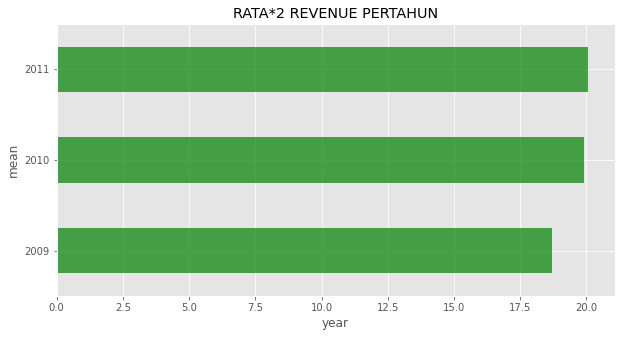

In [174]:
#memvisualisasikan rata rata revenue pertahun dengan diagram bar 
mean.plot(x='year', y='mean', kind='barh',
                figsize=(10,5), color='green', alpha=0.7)
plt.title('RATA*2 REVENUE PERTAHUN')
plt.ylabel('mean')
plt.xlabel('year')
plt.show()

### 1.5 Interpretation

Rata-rata revenue tahun 2009 ke 2010 naik pesat 18,71 ke 19,90 . 
Dan pada tahun 2010 ke 2011 naik sedikit dari 19,90 20,05 .

## Section 2

### Filtering Data 

#### 2.1 Customers who finished their purchases

In [176]:
#membuat filter finished 
finished = qunfil[qunfil['Customer ID'].notnull()]
finished.shape

(805620, 10)

#### 2.2 Customers who canceled their purchases

In [178]:
#membuat filter cancel
cancel = df[df['Invoice'].str.contains("C")]
cancel.shape

(19494, 10)

### 2.3 Number of Finished and Canceled Transactions Each Year

In [186]:
#membuat filter finistrans 
finistrans = finished.groupby('year')['InvoiceDate'].count().reset_index()
finistrans.rename(columns={'InvoiceDate' : 'Finished'}, inplace=True)
finistrans.head()

,year,Finished
0,2009,30761
1,2010,403094
2,2011,371765


In [190]:
#membuat filter canceltrans
canceltrans = cancel.groupby('year')['InvoiceDate'].count().reset_index()
canceltrans.rename(columns={'InvoiceDate' : 'cancel'}, inplace=True)
canceltrans.head()

,year,cancel
0,2009,1015
1,2010,9919
2,2011,8560


In [194]:
#mengabungkan rtabel transaksi yang finis dan cancel
transaksi_batal = canceltrans['cancel']
transaksi = finistrans
transaksi['cancel'] = transaksi_batal
transaksi

,year,Finished,cancel
0,2009,30761,1015
1,2010,403094,9919
2,2011,371765,8560


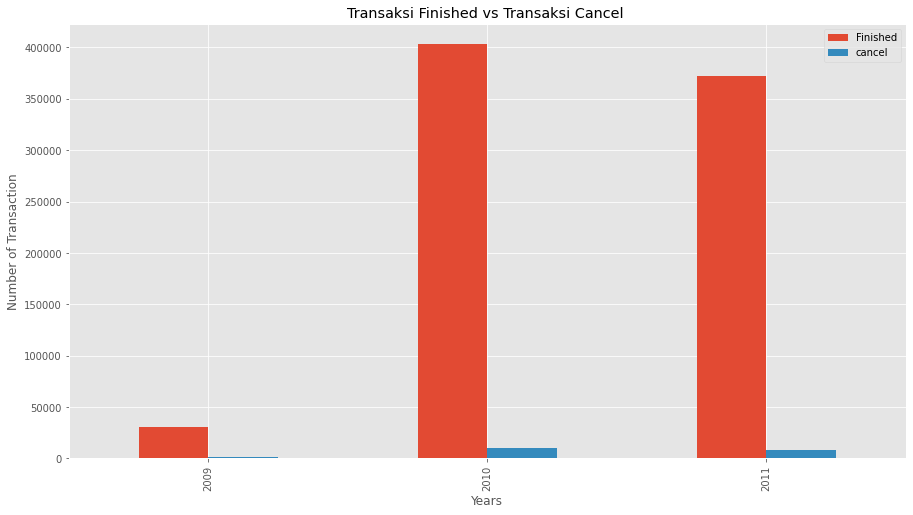

In [215]:
#MENAMPILKAN DIAGRAM VISUAL Transaksi Finished vs Transaksi Cancel
transaksi.plot(x='year',
          kind='bar', 
             stacked= False,
             figsize=(15, 8),
         alpha = 1
             )

plt.title('Transaksi Finished vs Transaksi Cancel ')
plt.ylabel('Number of Transaction')
plt.xlabel('Years')

plt.show()

### 2.4 Cancellation Rate

In [213]:
#membuat variabel total untuk menghitung rata rata cancel
total = transaksi['Finished'] + transaksi['cancel']
total

0     31776
1    413013
2    380325
dtype: int64

In [214]:
#Rata-rata cancel dalam % pertahun
rata2_cancel = transaksi['cancel'] / total * 100
rata2_cancel.values.tolist()
for i in range(len(rata2_cancel)):
  print(2009 + i, " rata rata cancel ", rata2_cancel[i], "%")

2009  rata rata cancel  3.194234642497482 %
2010  rata rata cancel  2.4016193194887325 %
2011  rata rata cancel  2.2507066324853744 %


### 2.4 Interpretation

kesimpulan yang dapat di ambil ialah, rata rata finis setiap tahun meningkat, dapat di lihat dari rata rata cancel yang menurun tiap tahunnya.